<a href="https://colab.research.google.com/github/uzma-knpc/Generative-AI/blob/main/ModalofNMI(version2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medical Images Diagnosis with UNET modal(Version-2)

In [1]:
!pip install -Uq facenet-pytorch
!pip install -Uq pillow
!pip install -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [2]:
from torchvision import models
from torch import nn
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os


In [52]:
import torch

# Create a 3x3 tensor with random values
tensor_example = torch.rand(3, 3)
print(tensor_example)

tensor([[0.2498, 0.7498, 0.8236],
        [0.9000, 0.4065, 0.9334],
        [0.1985, 0.1810, 0.6774]])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.2 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.10
    Uninstalling google-ai-generativelanguage-0.6.10:
      Successfully uninstalled google-ai-generativelanguage-0.6.10
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.8.3
    Uninstalling google-generativeai-0.8.3:
      Successfully uninstalled google-generativeai-0.8.3


In [3]:
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# Load a pre-trained model(Popular for medical image segmentation, such as identifying organs or tumors in scans.)
unet = models.segmentation.deeplabv3_resnet50(pretrained=True).eval()




/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 108MB/s] 


In [116]:
# Load and preprocess a medical image
image_path = '/content/bone_scan.jpg'
image = Image.open(image_path).convert('RGB').resize((256, 256))
image = np.array(image).transpose((2, 0, 1)) / 255.0  # Normalize
image = torch.tensor(image).unsqueeze(0)
print("Input shape:", image.shape)  # Should be (N, C, H, W)


Input shape: torch.Size([1, 3, 256, 256])


In [117]:
if len(image.shape) == 2:  # Grayscale image (H, W)
    image = image.unsqueeze(0).unsqueeze(0)  # Convert to (1, 1, H, W)
elif len(image.shape) == 3 and image.shape[0] == 256:  # If it's wrongly formatted
    image = image.unsqueeze(0)  # Convert to (1, 3, 256, 256)
print(f"lenimage{len(image.shape)}")
print("Input shape:", image.shape)  # Should be (N, C, H, W)

lenimage4
Input shape: torch.Size([1, 3, 256, 256])


In [125]:
# Perform segmentation

import torch
from torchvision.transforms import Resize



with torch.no_grad():
   import torch

# Ensure image is a PyTorch tensor
image = image.to(next(unet.parameters()).dtype)  # Convert image to model's dtype



# Simulating model output (segmented tensor)
#segmentation_map = torch.randint(0, 3, (250, 300))  # Random classes (0, 1, 2)
output = unet(image)  # Model output

if isinstance(output, dict):  # If U-Net outputs a dictionary (like torchvision models)
    output = output['out']
    #print(f"output{output}")

# Convert tensor to NumPy for visualization
resize = Resize((image.shape[1], image.shape[2]))
segmentation_map = torch.argmax(output, dim=1).squeeze().cpu().numpy()


print(image.shape[1], image.shape[2])

#segmentation_map = torch.argmax(output['out'], dim=1).squeeze().cpu().numpy()

#segmentation_map = resize(torch.tensor(segmentation_map)).numpy()



#segmentation_map = segmentation_map.numpy()

3 256


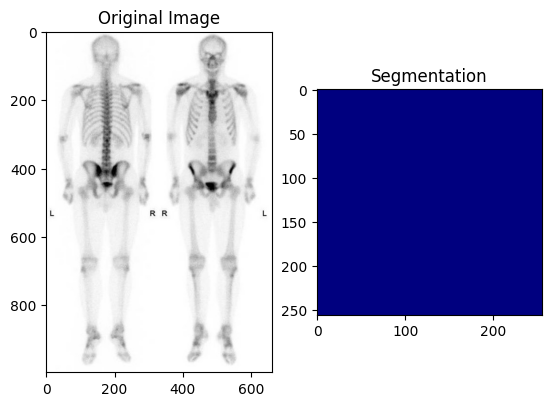

In [127]:
# Visualize results
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image.open(image_path))

plt.subplot(1, 2, 2)
plt.title("Segmentation")
plt.imshow(segmentation_map, cmap='jet')
plt.show()

In [ ]:
response=genai.GenerativeModel("gemini-1.5-flash")